#### 1. 단어 표현
- 어떻게 자연어를 컴퓨터에게 인식시킬 수 있을까 ?
- 원 핫 인코딩: 각 단어의 인덱스를 정한 후 각 단어의 벡터에서 그 단어에 해당하는 인덱스의 값을 1로 표현
    - 단점1: 수십만, 수백만개가 넘는 단어를 표현할 때
    - 단점2: 단어가 뭔지만 알려줄 수 있음. 단어의 의미나 특징 같은 것들이 전혀 표현되지 않음
- 카운트 기반 방법: 어떤 글의 문맥 안에 단어가 동시에 등장하는 횟수를 세는 방법
- 예측 방법: 신경망 구조 혹은 어떠한 모델을 사용해 특정 문맥에서 어떤 단어가 나올지를 예측하면서 단어를 벡터로 만드는 방식
    - Word2Vec
        - CBOW: 어떤 단어를 문맥 안의 주변 단어들을 통해 예측하는 방법(창욱은 냉장고에서 _____ 꺼내서 먹었다.)
        - Skip-Gram: 어떤 단어를 가지고 특정 문맥 안의 주변 단어들을 예측하는 방법(_____ _____ 음식을 _____ _____)

#### 2. 텍스트 분류
- 특정 텍스트를 사람들이 정한 몇가지 범주(Class) 중 어느 범주에 속하는지 분류하는 문제
- 지도 학습을 통한 텍스트 분류
    - 데이터에 대해 각각 속한 범주에 대한 값이 이미 주어져 있음
    - 주어진 범주로 학습한 후 결과를 이용해 새로운 글의 범주 예측
- 비지도 학습을 통한 텍스트 분류
    - 데이터만 존재하고, 범주로 나누어져 있지 않음
- 데이터에 정답 라벨이 있느냐 없느냐에 따라 지도 혹은 비지도 학습 선택

#### 3. 텍스트 유사도
- 다른 구조의 문장이지만 의미는 비슷하기 때문에 두 문장의 유사도가 높다고 판단
- 최대한 정량화 해서 모델을 만드는 것이 중요


In [1]:
# TF-IDF를 통한 벡터화 진행
from sklearn.feature_extraction.text import TfidfVectorizer
sent = ('휴일인 오늘도 서쪽을 중심으로 폭염이 이어졌는데요, 내일은 반가운 비 소식이 있습니다.', '폭염을 피해서 휴일에 놀러왔다가 갑작스런 비로 인해 망연자실 하고 있습니다.')
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) # 문장 벡터화

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names_out(), idf)))

{'갑작스런': 1.4054651081081644, '내일은': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '비로': 1.4054651081081644, '서쪽을': 1.4054651081081644, '소식이': 1.4054651081081644, '오늘도': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심으로': 1.4054651081081644, '폭염을': 1.4054651081081644, '폭염이': 1.4054651081081644, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일에': 1.4054651081081644, '휴일인': 1.4054651081081644}


##### 코사인 유사도
- 유사도를 계산할 때 가장 널리 쓰이는 방법
- 두 벡터 간의 각도를 구하는 것이라서 방향서의 개념이 더해지기 때문
    - 유사하다면 같은 방향으로 가리킬 것이고, 유사하지 않을수록 직교로 표현될 것

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

array([[0.05325384]])

##### 유클리디언 유사도
- 가장 기본적인 거리를 측정하는 유사도 공식
- 유클리디언 거리, L2 거리라고 불림
- n차원 공간에서 두 점 사이의 최단 거리를 구하는 접근법

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(tfidf_matrix[0], tfidf_matrix[1]) # 값의 제한이 없기 때문에 크기는 1이상 계속 커질 수 있음.

array([[1.37604227]])

In [14]:
## L1 정규화 방법을 사용하여 0과 1사의 값으로 변환
import numpy as np

def l1_normalize(v): # 벡터 안의 요소 값을 모두 더한 후, 이 값으로 각 벡터의 값을 나누면 됨.
    norm = np.sum(v)
    return v / norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0], tfidf_norm_l1[1])

array([[0.21843367]])

##### 맨해튼 유사도
- 사각형 격자로 이뤄진 지도에서 출발점에서 도착점까지를 가로지르지 않고 갈 수 있는 최단 거리
- L1 거리라고 부름
- 0과 1의 사이의 값을 갖도록 L1 정규화 방법을 사용해야 함

In [16]:
from sklearn.metrics.pairwise import manhattan_distances
manhattan_distances(tfidf_norm_l1[0], tfidf_norm_l1[1])

array([[0.92673556]])

#### 4. 자연어 생성
- 언어 생성은 사람의 대화를 최대한 많이 수집해서 대화를 배우게 하고 지속적으로 평가하는 과정을 반복해서 특정 목적에 맞는 텍스트를 생성하는 것이 주 목적

#### 5. 기계 이해
- 기계가 텍스트를 이해하고 논리적 추론을 할 수 있는지 데이터 학습을 통해 보는 것
- bAbI 데이터셋
    - 시간 순서대로 나열된 텍스트 문장 정보와 그에 대한 질문으로 구성되어 텍스트 정보에 대해 질문을 던지고 응답하는 형태
- SQuAD
    - 이 데이터셋에 관한 모델링에서는 정답을 선택하고자 할 때 텍스트의 토큰 위치의 시작점과 끝점을 지정하도록 학습
    - 평가는 정답 위치와 완벽하게 일치하는지를 보는 EM 점수와 정답 위치와 겹치는지를 보는 F1 점수를 통해 진행
- Visual Question Answering(VQA)
    - 이미지에 대한 정보와 텍스트 질의를 통해 이미지 컨텍스트에 해당하는 응답을 알려주는 태스크
    

#### 6. 데이터 이해하기
- 데이터 분석(EDA, Exploratory Data Analysis)
- 정해진 틀 없이 데이터에 대해 최대한 많은 정보를 뽑아내면 됨
- 평균값, 중앙값, 최소값, 최대값, 범위, 분포, 이상치(outlier) 등이 있음
- 이러한 값들을 확인하고 히스토그램, 그래프 등의 다양한 방법으로 시각화하면서 데이터에 대한 직관을 얻어야 함

In [23]:
import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

data_set = tf.keras.utils.get_file(fname='imdb.tar.gz', origin='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz', extract=True)

In [19]:
def directory_data(directory):
    data = {}
    data['review'] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), 'r') as file:
            data['review'].append(file.read())
    return pd.DataFrame.from_dict(data)

In [20]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, 'pos'))
    neg_df = directory_data(os.path.join(directory, 'neg'))
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0

    return pd.concat([pos_df, neg_df])

In [24]:
train_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'train'))
test_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test'))

In [25]:
train_df.head()

,review,sentiment
0,I would say that this film gives an insight to...,1
1,This is my favorite of the older Tom & Jerry c...,1
2,I find it so amazing that even after all these...,1
3,Debut? Wow--Cross-Eyed is easily one of the mo...,1
4,I first saw this movie when it came out in 199...,1


In [26]:
reviews = list(train_df['review'])

In [27]:
# 문자열 문장 리스트 토크나이징
tokenized_reviews = [r.split() for r in reviews]

# 토크나이징 된 리스트에 대한 각 길이 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

# 토크나이징 된 것을 붙여서 음절의 길이 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

##### 데이터 분석 진행(문장에 대한 길이 분포)

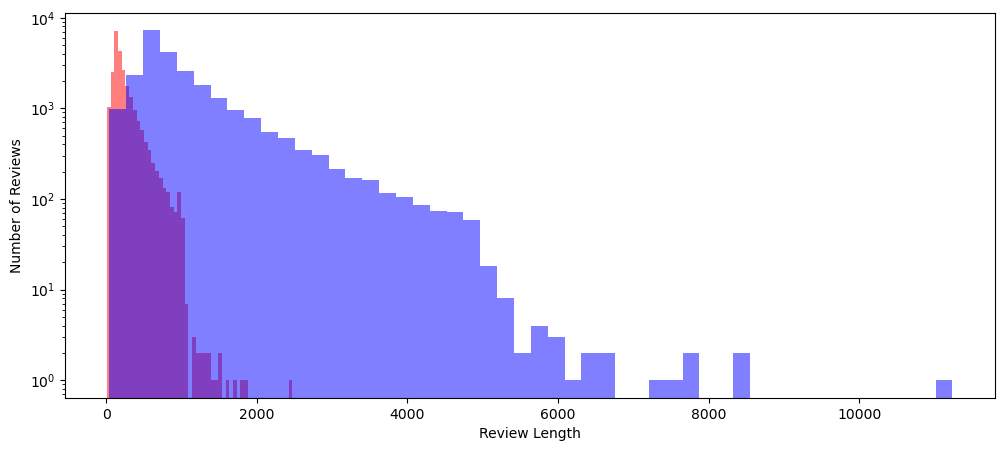

In [32]:
# 문장에 대한 길이 분포
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word') # 단어 개수에 대한 히스토그램
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet') # 알파벳 개수에 대한 히스토그램
plt.yscale('log')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()


##### 데이터 분포 통계치로 수치화(수치적으로 데이터 문장 길이의 분포 확인할 수 있음)

In [41]:
import numpy as np
print('문장 최대 길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이: {}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.median(review_len_by_token)))
print('제 1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대 길이: 2470
문장 최소 길이: 10
문장 평균 길이: 233.7872
문장 길이 표준편차: 173.72955740506563
문장 중간 길이: 174.0
제 1사분위 길이: 127.0
제 3사분위 길이: 284.0


##### 박스 플롯 데이터 시각화(전체적인 데이터 분포 확인 가능, 이상치가 심한 데이터 확인할 수 있음)

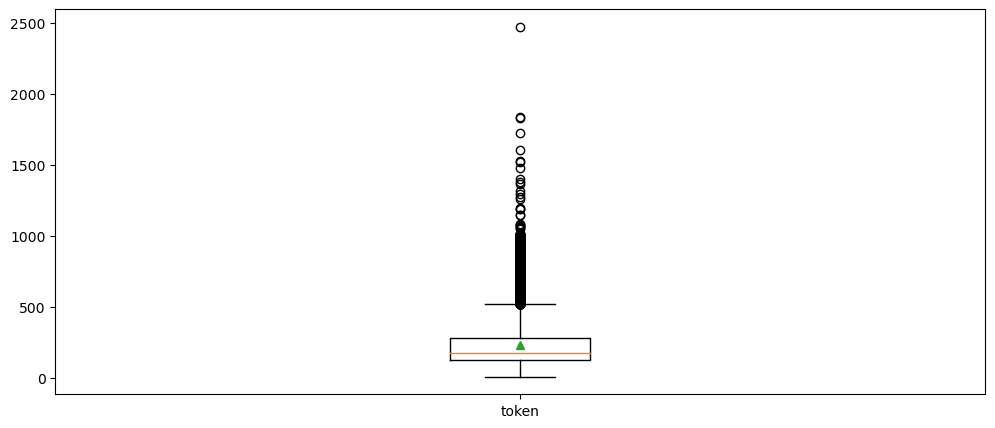

In [43]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_token], labels=['token'], showmeans=True) # 문장 내 단어수
plt.show()

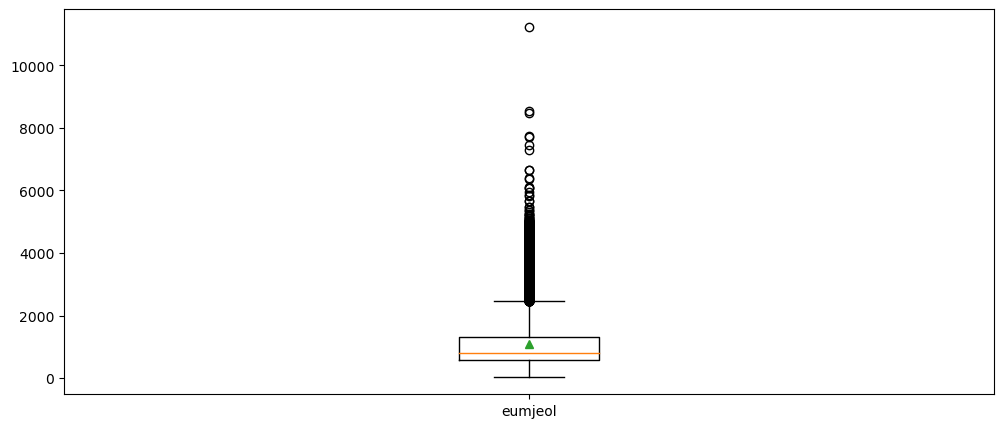

In [44]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol], labels=['eumjeol'], showmeans=True) # 문장의 알파벳 개수
plt.show()

##### 워드 클라우드 데이터 시각화

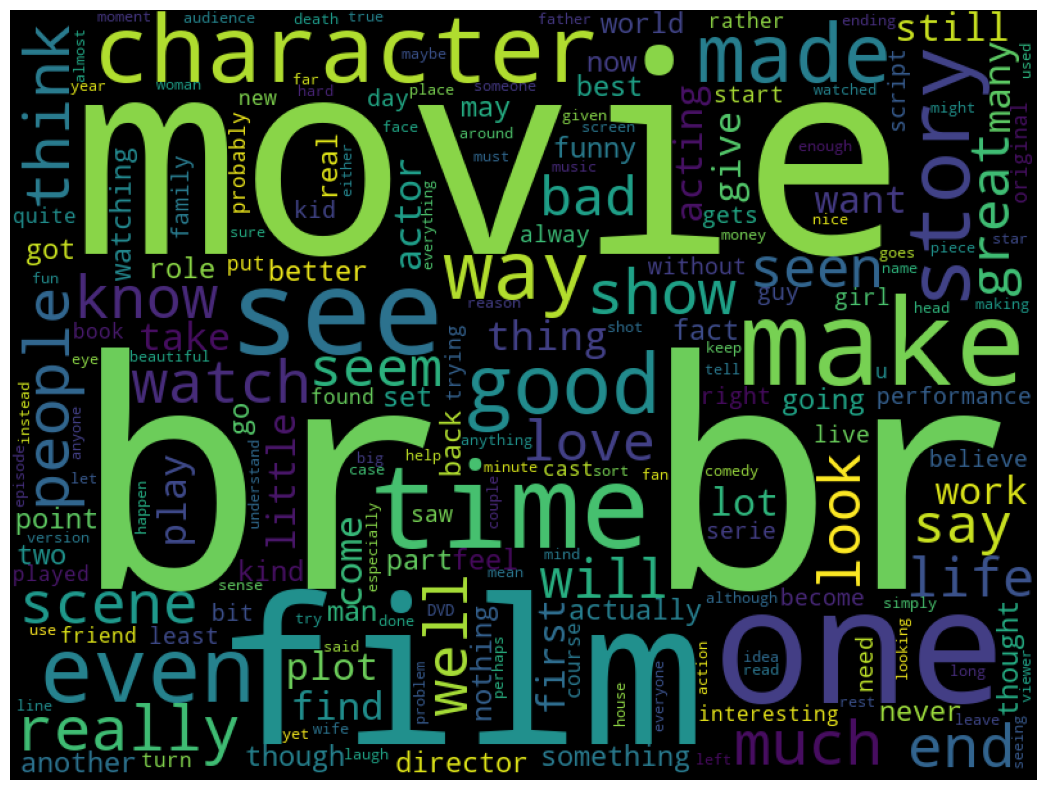

In [46]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=600).generate(' '.join(train_df['review']))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# 긍정 부정 분포 확인
import seaborn as sns

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'], index=[0])